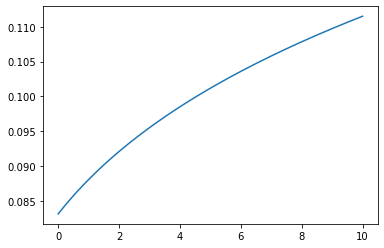

In [15]:
### We are now going to see what happens with the practical example when we introduce an efficiency term

import numpy as np
from scipy import stats
from scipy.stats import norm, expon, powerlaw
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import cm

class eff_profile(stats.rv_continuous):
    def __pdf(self,x,y):
        return x*y

np.random.seed(1)  # fix seed

# true parameters for signal and background
truth_n_sig = 500
truth_n_bkg = 2000

# signal mass gauss:(mean, sigma)
truth_sig_m = (5280, 30)
# background mass expo:(loc, scale)
truth_bkg_m = (5000,400,)
# signal time expo:(loc, scale)
truth_sig_t = (0, 2.0,)
# background time gauss:(mean, sigma)
truth_bkg_t = (0., 3.0)

# make the pdfs
sig_pdf_mass = norm(*truth_sig_m)
bkg_pdf_mass = expon(*truth_bkg_m)
sig_pdf_time = expon(*truth_sig_t)
bkg_pdf_time = norm(*truth_bkg_t)

# eff func
eff_pdf = powerlaw(1.2,-3,13)

# plot the pdfs
mrange = (5000,5600)
trange = (0,10)
mass = np.linspace(*mrange,500)
time = np.linspace(*trange,500)

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(time, eff_pdf.pdf(time)/np.diff(eff_pdf.cdf(trange)))